# Part 3: Data Analysis and Visualization

**Name:** Brayden Uglione

**Date:** 10/10/24

**Exercise:** Project #1, Data Analysis and Visualization

**Purpose:** To analyze survey data from non-computing majors and provide insights that can help increase the number of students taking computing classes at CCM.

## Import Libraries and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv('cleaned_non_majors_survey_results.csv')

## Question 1: Which courses are students enrolled in?

The code counts and filters student enrollments in specific courses, visualizes the distribution with a bar chart, and prints the enrollment counts alongside course names.

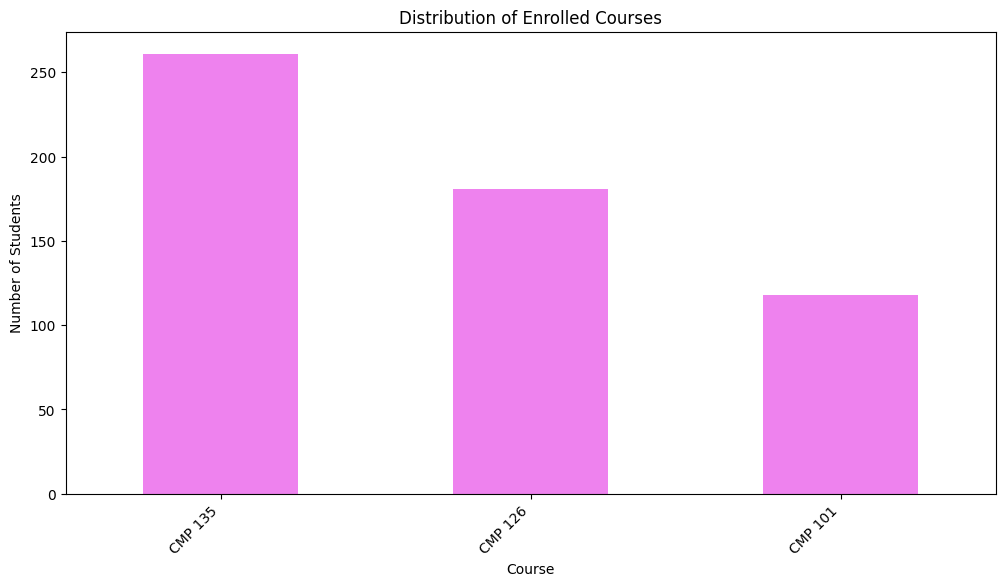

Course Enrollment Counts:
CMP 135: 261 - Computer Concepts with Applications
CMP 126: 181 - Computer Technology and Applications
CMP 101: 118 - Computer Information Literacy


In [2]:
# Analyze courses as a proxy for degree programs
course_counts = df['which_course_are_you_currently_enrolled_in'].value_counts()

# Filter out 'Unknown' and keep only the courses defined in course_key
course_key = {
    'CMP 135': 'Computer Concepts with Applications',
    'CMP 101': 'Computer Information Literacy',
    'CMP 126': 'Computer Technology and Applications',
}
course_counts = course_counts[course_counts.index.isin(course_key.keys())]

# Create a bar chart to visualize course distribution
plt.figure(figsize=(12, 6))
course_counts.plot(kind='bar', color='violet')
plt.title('Distribution of Enrolled Courses')
plt.xlabel('Course')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the counts of each course for reference
print("Course Enrollment Counts:")
for course, count in course_counts.items():
    print(f"{course}: {count} - {course_key[course]}")

## Question 2: What percentage of students heard about CCM through each marketing channel?

The code identifies marketing channel columns, calculates the percentage of positive responses for each channel, formats channel names, creates a bar chart to visualize the results, and prints the effectiveness percentages for each marketing channel.

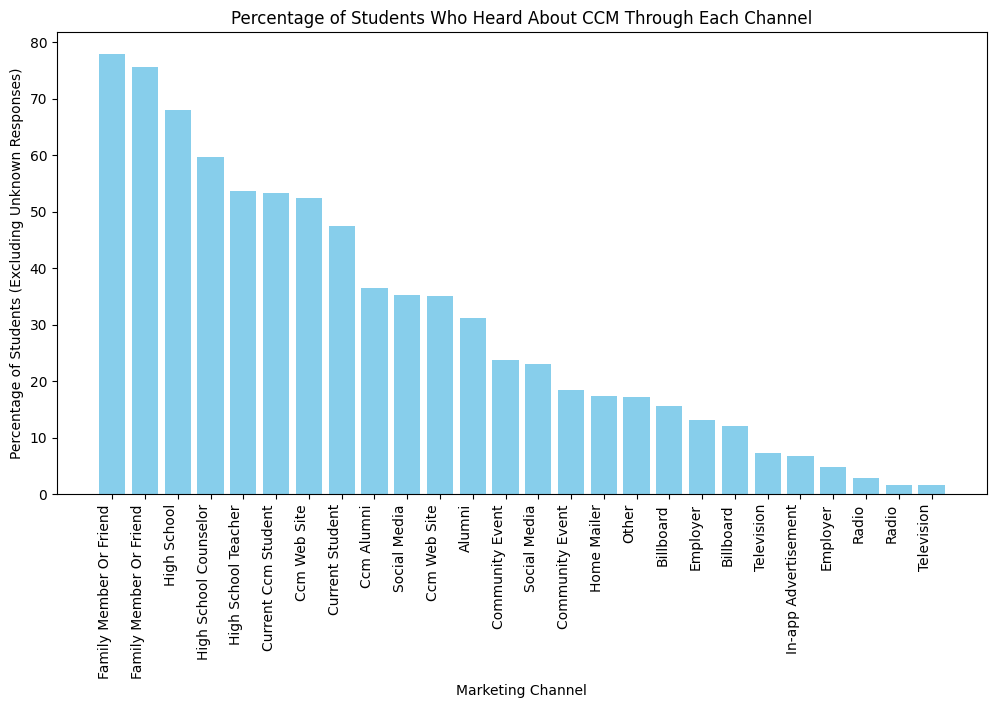

Marketing Channel Effectiveness (Excluding Unknown Responses):
Family Member Or Friend: 77.87%
Family Member Or Friend: 75.56%
High School: 68.03%
High School Counselor: 59.72%
High School Teacher: 53.74%
Current Ccm Student: 53.27%
Ccm Web Site: 52.46%
Current Student: 47.54%
Ccm Alumni: 36.49%
Social Media: 35.25%
Ccm Web Site: 35.07%
Alumni: 31.15%
Community Event: 23.77%
Social Media: 23.08%
Community Event: 18.40%
Home Mailer: 17.31%
Other: 17.26%
Billboard: 15.57%
Employer: 13.11%
Billboard: 12.14%
Television: 7.21%
In-app Advertisement: 6.83%
Employer: 4.85%
Radio: 2.93%
Radio: 1.64%
Television: 1.64%


In [3]:
# Calculate percentage of 'Yes' responses out of 'Yes' and 'No' responses for each channel
def calculate_percentage(series):
    valid_responses = series[series.isin(['Yes', 'No'])]
    if len(valid_responses) > 0:
        return (valid_responses == 'Yes').sum() / len(valid_responses) * 100
    return 0

# Function to format channel names
def format_channel_name(channel):
    start = channel.find('[') + 1
    end = channel.find(']')
    if start > 0 and end > start:
        name = channel[start:end]
        return ' '.join(word.capitalize() for word in name.split('_'))
    return channel

# Identify marketing channel columns
marketing_channels = [col for col in df.columns if col.startswith('how_did_you_hear_about_county_college_of_morris_') and 'check_all_that_apply' not in col]

# Apply the calculate_percentage function to each marketing channel column
channel_percentages = df[marketing_channels].apply(calculate_percentage)

# Format channel names and sort by percentage
channel_percentages_sorted = channel_percentages.sort_values(ascending=False)
formatted_labels = [format_channel_name(channel) for channel in channel_percentages_sorted.index]

# Create a bar chart with a specified color
plt.figure(figsize=(12, 6))
plt.bar(range(len(formatted_labels)), channel_percentages_sorted.values, color='skyblue')
plt.title('Percentage of Students Who Heard About CCM Through Each Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Percentage of Students (Excluding Unknown Responses)')
plt.xticks(range(len(formatted_labels)), formatted_labels, rotation=90, ha='right')
plt.show()

# Print the percentages
print("Marketing Channel Effectiveness (Excluding Unknown Responses):")
for label, percentage in zip(formatted_labels, channel_percentages_sorted):
    print(f"{label}: {percentage:.2f}%")

## Question 3: Which prior computing experiences were most influential in students' decisions to enroll?

This code analyzes and visualizes students' prior computing experiences before applying to County College of Morris.

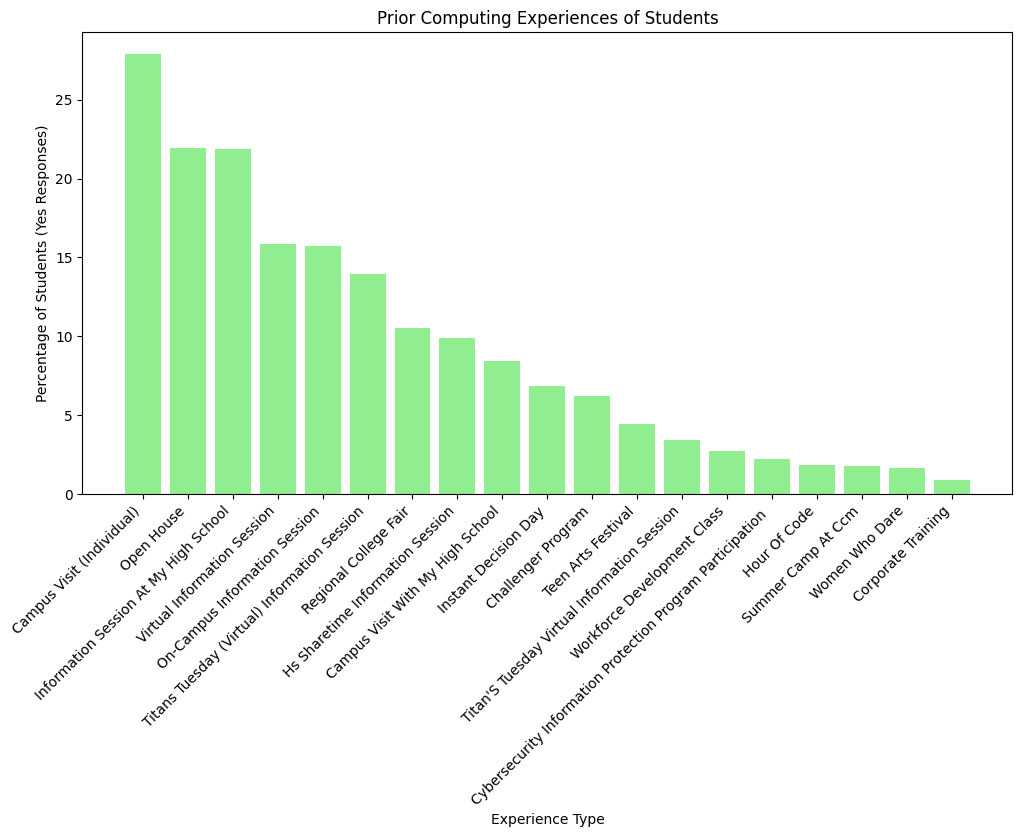

Prior Computing Experiences:
Campus Visit (Individual): 27.88%
Open House: 21.95%
Information Session At My High School: 21.88%
Virtual Information Session: 15.87%
On-Campus Information Session: 15.71%
Titans Tuesday (Virtual) Information Session: 13.96%
Regional College Fair: 10.54%
Hs Sharetime Information Session: 9.87%
Campus Visit With My High School: 8.41%
Instant Decision Day: 6.83%
Challenger Program: 6.22%
Teen Arts Festival: 4.46%
Titan'S Tuesday Virtual Information Session: 3.45%
Workforce Development Class: 2.71%
Cybersecurity Information Protection Program Participation : 2.24%
Hour Of Code: 1.83%
Summer Camp At Ccm: 1.79%
Women Who Dare: 1.68%
Corporate Training: 0.91%


In [4]:
# Function to calculate percentage of 'Yes' responses
def calculate_yes_percentage(series):
    valid_responses = series[series.isin(['Yes', 'No'])]
    yes_count = (valid_responses == 'Yes').sum()
    total_valid = len(valid_responses)
    return (yes_count / total_valid * 100) if total_valid > 0 else 0

# Function to format column names
def format_column_name(col):
    start = col.rfind('[') + 1
    end = col.rfind(']')
    if start > 0 and end > start:
        return col[start:end].replace('_', ' ').title()
    return col

# Identify columns related to prior computing experiences
experience_columns = [
    col for col in df.columns if col.startswith('prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and/or_with_the_department_of_information_technologies,_if_at_all_')
]

# Calculate percentages for each experience type
experience_percentages = df[experience_columns].apply(calculate_yes_percentage)

# Sort percentages in descending order
experience_percentages_sorted = experience_percentages.sort_values(ascending=False)

# Format column names
formatted_labels = [format_column_name(col) for col in experience_percentages_sorted.index]

# Create a bar chart to visualize prior computing experiences
plt.figure(figsize=(12, 6))
plt.bar(range(len(formatted_labels)), experience_percentages_sorted.values, color='lightgreen')
plt.title('Prior Computing Experiences of Students')
plt.xlabel('Experience Type')
plt.ylabel('Percentage of Students (Yes Responses)')
plt.xticks(range(len(formatted_labels)), formatted_labels, rotation=45, ha='right')
plt.show()

# Print the percentages for reference
print("Prior Computing Experiences:")
for label, percentage in zip(formatted_labels, experience_percentages_sorted):
    print(f"{label}: {percentage:.2f}%")

## Question 4: Is there a correlation between gender and interest level in taking more computing courses?

This code analyzes and visualizes the relationship between gender and interest level in taking more computing courses at County College of Morris.

<Figure size 1000x600 with 0 Axes>

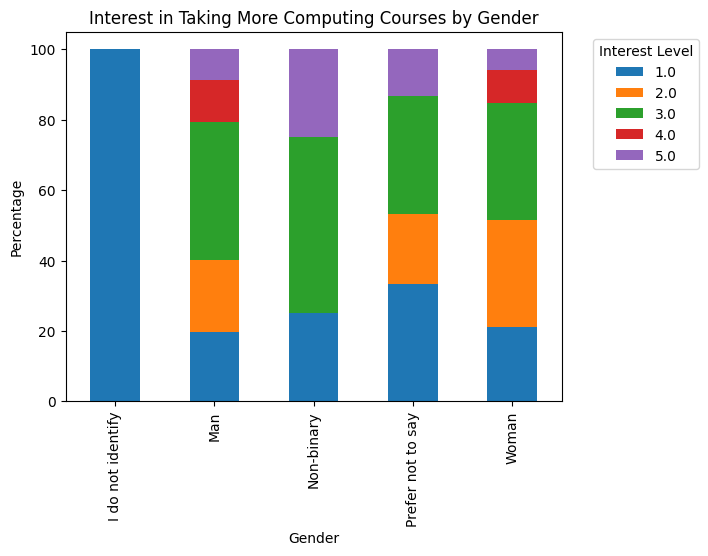

Contingency Table Percentages:
interest_level            1.0        2.0        3.0        4.0        5.0
gender                                                                   
I do not identify  100.000000   0.000000   0.000000   0.000000   0.000000
Man                 19.617225  20.574163  39.234450  11.961722   8.612440
Non-binary          25.000000   0.000000  50.000000   0.000000  25.000000
Prefer not to say   33.333333  20.000000  33.333333   0.000000  13.333333
Woman               21.036585  30.487805  33.231707   9.451220   5.792683

Average Interest Level by Gender:
gender
I do not identify    1.000000
Man                  2.693780
Non-binary           3.000000
Prefer not to say    2.400000
Woman                2.484756
Name: interest_level, dtype: float64


In [5]:
# Rename the long column name for easier handling
df = df.rename(columns={'on_a_scale_of_1_to_5,_with_1_being_not_at_all_interested_and_5_being_extremely_interested,_how_interested_are_you_taking_more_courses_in_computer_science,_information_technology_or_game_development': 'interest_level'})

# Convert interest_level to numeric, then to integer, excluding non-integer values and values outside 1-5 range
df['interest_level'] = pd.to_numeric(df['interest_level'], errors='coerce')
df['interest_level'] = df['interest_level'].apply(lambda x: int(x) if x.is_integer() else None)
df = df[(df['interest_level'] >= 1) & (df['interest_level'] <= 5)]

# Remove rows where gender is "Unknown"
df = df[df['gender'] != 'Unknown']

# Create a contingency table to analyze gender vs interest level
contingency_table = pd.crosstab(df['gender'], df['interest_level'])

# Calculate percentages for the contingency table
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Create a stacked bar chart to visualize interest levels by gender
plt.figure(figsize=(10, 6))
contingency_table_percentage.plot(kind='bar', stacked=True)
plt.title('Interest in Taking More Computing Courses by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Interest Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Print the contingency table percentages for reference
print("Contingency Table Percentages:")
print(contingency_table_percentage)

# Calculate and print the average interest level for each gender
average_interest = df.groupby('gender')['interest_level'].mean()
print("\nAverage Interest Level by Gender:")
print(average_interest)